In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Conv2D,MaxPooling2D, Flatten, BatchNormalization , Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import datasets, layers, models

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
x_train[0].shape


(28, 28)

In [6]:
x_train_new = x_train/255.0
x_test_new = x_test/255.0

In [7]:
model = Sequential()
model.add(Conv2D(30,kernel_size=(3,3),activation='relu',padding='valid',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2),padding='valid',strides=2))

model.add(Conv2D(50,kernel_size=(3,3),activation='relu',padding='valid',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2),padding='valid',strides=2))

model.add(Conv2D(70,kernel_size=(3,3),activation='relu',padding='valid',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2),padding='valid',strides=2))

model.add(Flatten())
model.add(Dense(70,activation='relu'))
model.add(Dense(10,activation='softmax'))

/Users/apple/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [9]:
early_stopping = EarlyStopping(monitor='val_loss',patience=3,restore_best_weights=True)

In [10]:
history = model.fit(x_train_new,y_train,epochs=4,validation_data=(x_test_new,y_test),callbacks=[early_stopping])

Epoch 1/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 13ms/step - accuracy: 0.8552 - loss: 0.4562 - val_accuracy: 0.9762 - val_loss: 0.0760
Epoch 2/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9743 - loss: 0.0803 - val_accuracy: 0.9820 - val_loss: 0.0585
Epoch 3/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9836 - loss: 0.0542 - val_accuracy: 0.9858 - val_loss: 0.0487
Epoch 4/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9873 - loss: 0.0395 - val_accuracy: 0.9839 - val_loss: 0.0540


Loss vs Val_Loss

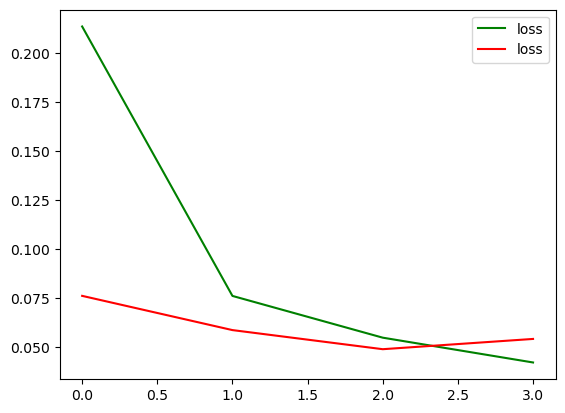

In [11]:
plt.plot(history.history['loss'],label='loss',color='green')
plt.plot(history.history['val_loss'],label='loss',color='red')
plt.legend()
plt.show()

Accuracy vs Val_Accuracy Graph

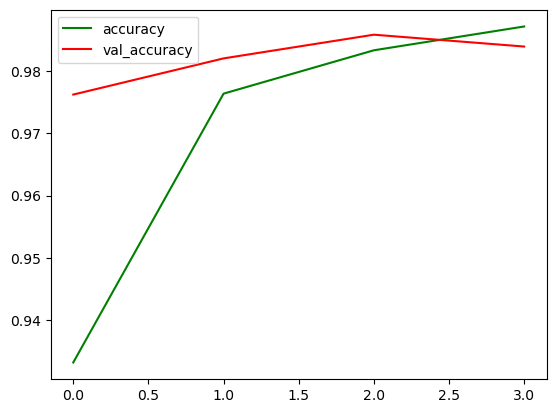

In [12]:
plt.plot(history.history['accuracy'],label='accuracy',color='green')
plt.plot(history.history['val_accuracy'],label='val_accuracy',color='red')
plt.legend()
plt.show()

In [13]:
import cv2
test = cv2.imread('/Users/apple/Documents/CNN/two4.jpeg', cv2.IMREAD_GRAYSCALE)
test = cv2.resize(test, (28, 28))
print("Shape of test_img after resizing:", test.shape)
dt = test.reshape((1, 28, 28, -1))


Shape of test_img after resizing: (28, 28)


In [14]:
y1 = model.predict(dt)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


In [15]:
p1 = np.argmax(y1)

In [16]:
p1

2

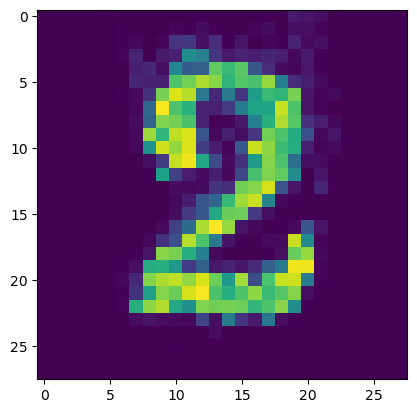

In [17]:
plt.imshow(test)

In [18]:
test1 = cv2.imread('/Users/apple/Documents/CNN/seven3.jpeg', cv2.IMREAD_GRAYSCALE)
test1 = cv2.resize(test1, (28, 28))
print("Shape of test_img after resizing:", test.shape)
dt1 = test1.reshape((1, 28, 28, -1))


Shape of test_img after resizing: (28, 28)


In [19]:
p2 = np.argmax(model.predict(dt1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


In [20]:
p2

2

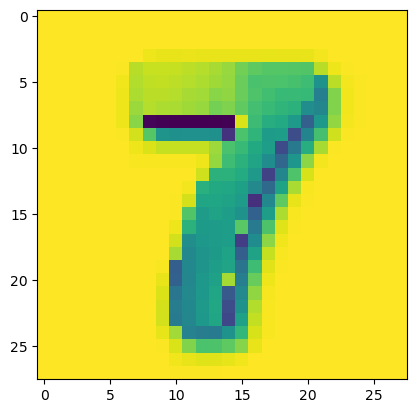

In [21]:
plt.imshow(test1)

In [24]:
y_prob=model.predict(x_test_new)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [29]:
y = y_prob[3]

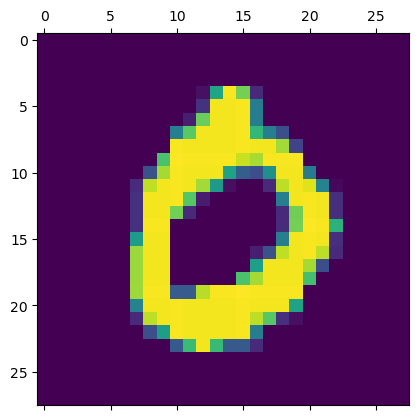

In [26]:
plt.matshow(x_test[3])

In [30]:
y_pred = np.argmax(y)

In [31]:
y_pred

0

In [38]:

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 30)     │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 30)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 50)     │        13,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 50)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 70)       │        31,570 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 70)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 70)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 70)             │         4,970 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           710 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 153,302 (598.84 KB)

 Trainable params: 51,100 (199.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 102,202 (399.23 KB)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


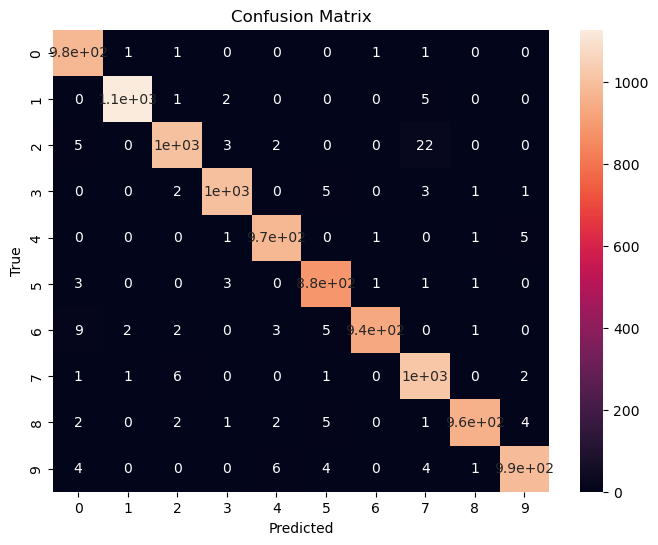

In [40]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred_classes = np.argmax(model.predict(x_test_new), axis=1)
cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
